#Project By:
#Anurag Porwal - 19312004
#Avi Gupta - 19312006
#Harsh Indoria - 19121012
#Rakshit Joshi - 19312025

#Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sleep_data=pd.read_excel('G21_Raw_Data_Combined.xlsx')

In [3]:
sleep_data

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,20,Male,4,No,more than 5,No,West,Sometimes,No,Tea,8.0
1,21,Male,3,No,more than 5,No,North,Sometimes,No,Tea and coffee both,8.0
2,20,Male,3,No,more than 5 hrs,No,North,Yes,No,None,7.0
3,19,Male,4,No,4-5 hrs,No,East,Yes,No,None,8.0
4,45,Female,3,No,3-4 hrs,No,North,Sometimes,No,None,6.0
...,...,...,...,...,...,...,...,...,...,...,...
75,22,Male,three,no,3-4 hrs,no,east,sometimes,no,Tea,6.0
76,21,Male,two,no,more than 5,no,east,sometimes,no,Tea,7.0
77,24,Male,three,no,more than 5,yes,east,sometimes,no,none of the above,4.0
78,25,Prefer not to say,three,yes,more than 5,yes,east,yes,yes,Tea and Coffee both,8.0


In [4]:
indx=[]
for i in range(len(sleep_data.Age)):
    if ('Prefer not to say'== sleep_data.Gender[i])|('2hrs'==sleep_data['screen time'][i]):
        indx.append(i)
sleep_data=sleep_data.drop(indx)
print(sleep_data['Gender'].unique(),sleep_data['screen time'].unique())

['Male' 'Female'] ['more than 5' 'more than 5 hrs' '4-5 hrs' '3-4 hrs' '2-3 hrs' '1-2 hrs'
 '0-1 hrs']


In [5]:
sleep_data.reset_index()
sleep_data

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,20,Male,4,No,more than 5,No,West,Sometimes,No,Tea,8.0
1,21,Male,3,No,more than 5,No,North,Sometimes,No,Tea and coffee both,8.0
2,20,Male,3,No,more than 5 hrs,No,North,Yes,No,None,7.0
3,19,Male,4,No,4-5 hrs,No,East,Yes,No,None,8.0
4,45,Female,3,No,3-4 hrs,No,North,Sometimes,No,None,6.0
...,...,...,...,...,...,...,...,...,...,...,...
74,22,Female,two,no,3-4 hrs,no,south,yes,no,Tea,6.0
75,22,Male,three,no,3-4 hrs,no,east,sometimes,no,Tea,6.0
76,21,Male,two,no,more than 5,no,east,sometimes,no,Tea,7.0
77,24,Male,three,no,more than 5,yes,east,sometimes,no,none of the above,4.0


In [6]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               77 non-null     int64  
 1   Gender            77 non-null     object 
 2   meals/day         77 non-null     object 
 3   physical illness  77 non-null     object 
 4   screen time       77 non-null     object 
 5   bluelight filter  77 non-null     object 
 6   sleep direction   77 non-null     object 
 7   exercise          77 non-null     object 
 8   smoke/drink       77 non-null     object 
 9   beverage          77 non-null     object 
 10  sleep time        77 non-null     float64
dtypes: float64(1), int64(1), object(9)
memory usage: 7.2+ KB


In [7]:
sleep_data['screen time'].unique()

array(['more than 5', 'more than 5 hrs', '4-5 hrs', '3-4 hrs', '2-3 hrs',
       '1-2 hrs', '0-1 hrs'], dtype=object)

In [8]:
sleep_data['screen time'].replace('more than 5 hrs','more than 5',inplace=True)

In [9]:
sleep_data['beverage'].unique()

array(['Tea', 'Tea and coffee both', 'None', 'Coffee',
       'Tea and Coffee both', 'none of the above'], dtype=object)

In [10]:
sleep_data['beverage'].replace(['none of the above','Tea and coffee both'],['None','Tea and Coffee both'],inplace=True)

In [11]:
sleep_data['Tea']=np.where((sleep_data['beverage']=='Tea') | (sleep_data['beverage']=='Tea and Coffee both'),1,0)

In [12]:
sleep_data.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea
0,20,Male,4,No,more than 5,No,West,Sometimes,No,Tea,8.0,1
1,21,Male,3,No,more than 5,No,North,Sometimes,No,Tea and Coffee both,8.0,1
2,20,Male,3,No,more than 5,No,North,Yes,No,None,7.0,0
3,19,Male,4,No,4-5 hrs,No,East,Yes,No,None,8.0,0
4,45,Female,3,No,3-4 hrs,No,North,Sometimes,No,None,6.0,0


In [13]:
sleep_data['Coffee']=np.where((sleep_data['beverage']=='Coffee') | (sleep_data['beverage']=='Tea and Coffee both'),1,0)

In [14]:
sleep_data.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea,Coffee
0,20,Male,4,No,more than 5,No,West,Sometimes,No,Tea,8.0,1,0
1,21,Male,3,No,more than 5,No,North,Sometimes,No,Tea and Coffee both,8.0,1,1
2,20,Male,3,No,more than 5,No,North,Yes,No,None,7.0,0,0
3,19,Male,4,No,4-5 hrs,No,East,Yes,No,None,8.0,0,0
4,45,Female,3,No,3-4 hrs,No,North,Sometimes,No,None,6.0,0,0


In [15]:
sleep_data['exercise'].unique()

array(['Sometimes', 'Yes', 'No', 'no', 'sometimes', 'yes'], dtype=object)

In [16]:
sleep_data['exercise'].replace(['Yes','No'],['yes','no'],inplace=True)

In [17]:
sleep_data['exercise'].replace('Sometimes','sometimes',inplace=True)

In [18]:
for i in sleep_data.columns:
    print(sleep_data[i].unique())

[20 21 19 45 17 26 47 58 18 25 30 28 31 22 23 24 59 39 50]
['Male' 'Female']
[4 3 5 2 'three' 'two' 'four' 'five' 'one']
['No' 'Yes' 'no' 'yes']
['more than 5' '4-5 hrs' '3-4 hrs' '2-3 hrs' '1-2 hrs' '0-1 hrs']
['No' 'Yes' 'no' 'yes']
['West' 'North' 'East' 'South' 'south' 'east' 'west' 'north']
['sometimes' 'yes' 'no']
['No' 'Yes' 'no' 'yes']
['Tea' 'Tea and Coffee both' 'None' 'Coffee']
[ 8.      7.      6.      5.9     8.5     6.5     7.5    10.      6.7575
  5.      3.33    9.      4.    ]
[1 0]
[0 1]


In [19]:
sleep_data['physical illness'].replace(('Yes','No','yes','no'),(1,0,1,0),inplace=True)

In [20]:
sleep_data['bluelight filter'].replace(('Yes','No','yes','no'),(1,0,1,0),inplace=True)

In [21]:
sleep_data['Gender'].replace(('Male','Female'),(1,0),inplace=True)

In [22]:
sleep_data['smoke/drink'].replace(('Yes','No','yes','no'),(1,0,1,0),inplace=True)
sleep_data['exercise'].replace(('yes','no','sometimes'),(1,0,1),inplace=True)

In [23]:
sleep_data['meals/day'].unique()

array([4, 3, 5, 2, 'three', 'two', 'four', 'five', 'one'], dtype=object)

In [24]:
sleep_data['meals/day'].value_counts()

three    21
3        16
two      15
4         9
2         6
5         3
four      3
one       3
five      1
Name: meals/day, dtype: int64

In [25]:
sleep_data['meals/day'].replace(('one','two','three','four','five'),(1,2,3,4,5),inplace=True)

In [26]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               77 non-null     int64  
 1   Gender            77 non-null     int64  
 2   meals/day         77 non-null     int64  
 3   physical illness  77 non-null     int64  
 4   screen time       77 non-null     object 
 5   bluelight filter  77 non-null     int64  
 6   sleep direction   77 non-null     object 
 7   exercise          77 non-null     int64  
 8   smoke/drink       77 non-null     int64  
 9   beverage          77 non-null     object 
 10  sleep time        77 non-null     float64
 11  Tea               77 non-null     int64  
 12  Coffee            77 non-null     int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 8.4+ KB


In [27]:
sleep_data['screen time'].unique()

array(['more than 5', '4-5 hrs', '3-4 hrs', '2-3 hrs', '1-2 hrs',
       '0-1 hrs'], dtype=object)

In [28]:
sleep_data['screen time'].replace(('0-1 hrs','1-2 hrs','2hrs','2-3 hrs','3-4 hrs','4-5 hrs','more than 5'),(0.5,1.5,2,2.5,3.5,4.5,6),inplace=True)

In [29]:
sleep_data.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea,Coffee
0,20,1,4,0,6.0,0,West,1,0,Tea,8.0,1,0
1,21,1,3,0,6.0,0,North,1,0,Tea and Coffee both,8.0,1,1
2,20,1,3,0,6.0,0,North,1,0,None,7.0,0,0
3,19,1,4,0,4.5,0,East,1,0,None,8.0,0,0
4,45,0,3,0,3.5,0,North,1,0,None,6.0,0,0


In [30]:
sleep_data['west']=np.where((sleep_data['sleep direction']=='west')|(sleep_data['sleep direction']=='West'),1,0)
sleep_data['east']=np.where((sleep_data['sleep direction']=='east')|(sleep_data['sleep direction']=='East'),1,0)
sleep_data['south']=np.where((sleep_data['sleep direction']=='south')|(sleep_data['sleep direction']=='South'),1,0)

In [31]:
sleep_data.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea,Coffee,west,east,south
0,20,1,4,0,6.0,0,West,1,0,Tea,8.0,1,0,1,0,0
1,21,1,3,0,6.0,0,North,1,0,Tea and Coffee both,8.0,1,1,0,0,0
2,20,1,3,0,6.0,0,North,1,0,None,7.0,0,0,0,0,0
3,19,1,4,0,4.5,0,East,1,0,None,8.0,0,0,0,1,0
4,45,0,3,0,3.5,0,North,1,0,None,6.0,0,0,0,0,0


In [32]:
#sleep_data.to_csv('Combined_Sleep_Analysis.csv')

In [33]:
sleep_data

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea,Coffee,west,east,south
0,20,1,4,0,6.0,0,West,1,0,Tea,8.0,1,0,1,0,0
1,21,1,3,0,6.0,0,North,1,0,Tea and Coffee both,8.0,1,1,0,0,0
2,20,1,3,0,6.0,0,North,1,0,None,7.0,0,0,0,0,0
3,19,1,4,0,4.5,0,East,1,0,None,8.0,0,0,0,1,0
4,45,0,3,0,3.5,0,North,1,0,None,6.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,22,0,2,0,3.5,0,south,1,0,Tea,6.0,1,0,0,0,1
75,22,1,3,0,3.5,0,east,1,0,Tea,6.0,1,0,0,1,0
76,21,1,2,0,6.0,0,east,1,0,Tea,7.0,1,0,0,1,0
77,24,1,3,0,6.0,1,east,1,0,None,4.0,0,0,0,1,0


In [34]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               77 non-null     int64  
 1   Gender            77 non-null     int64  
 2   meals/day         77 non-null     int64  
 3   physical illness  77 non-null     int64  
 4   screen time       77 non-null     float64
 5   bluelight filter  77 non-null     int64  
 6   sleep direction   77 non-null     object 
 7   exercise          77 non-null     int64  
 8   smoke/drink       77 non-null     int64  
 9   beverage          77 non-null     object 
 10  sleep time        77 non-null     float64
 11  Tea               77 non-null     int64  
 12  Coffee            77 non-null     int64  
 13  west              77 non-null     int64  
 14  east              77 non-null     int64  
 15  south             77 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usa

In [35]:
del_columns=['sleep direction','beverage','sleep time']
X=sleep_data.copy()
X.drop(columns=del_columns,inplace=True)
from sklearn.preprocessing import MinMaxScaler,StandardScaler
X.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,exercise,smoke/drink,Tea,Coffee,west,east,south
0,20,1,4,0,6.0,0,1,0,1,0,1,0,0
1,21,1,3,0,6.0,0,1,0,1,1,0,0,0
2,20,1,3,0,6.0,0,1,0,0,0,0,0,0
3,19,1,4,0,4.5,0,1,0,0,0,0,1,0
4,45,0,3,0,3.5,0,1,0,0,0,0,0,0


In [36]:
sleep_data.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time,Tea,Coffee,west,east,south
0,20,1,4,0,6.0,0,West,1,0,Tea,8.0,1,0,1,0,0
1,21,1,3,0,6.0,0,North,1,0,Tea and Coffee both,8.0,1,1,0,0,0
2,20,1,3,0,6.0,0,North,1,0,None,7.0,0,0,0,0,0
3,19,1,4,0,4.5,0,East,1,0,None,8.0,0,0,0,1,0
4,45,0,3,0,3.5,0,North,1,0,None,6.0,0,0,0,0,0


In [37]:
mnmx=MinMaxScaler()
mnmx.fit(X)
X=mnmx.transform(X)
X

array([[0.07142857, 1.        , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.0952381 , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.07142857, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0952381 , 1.        , 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.16666667, 1.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.14285714, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ]])

In [38]:
Y=sleep_data['sleep time'].copy()
sleep_data['sleep time']

0     8.0
1     8.0
2     7.0
3     8.0
4     6.0
     ... 
74    6.0
75    6.0
76    7.0
77    4.0
79    8.0
Name: sleep time, Length: 77, dtype: float64

In [39]:
Z=(Y>=7)
Z=Z.astype(int)
Z

0     1
1     1
2     1
3     1
4     0
     ..
74    0
75    0
76    1
77    0
79    1
Name: sleep time, Length: 77, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Z_train,Z_test=train_test_split(X,Z,test_size=0.3,stratify=Z,random_state=1)

In [41]:
print(X_train.shape,X_test.shape,Z_train.shape,Z_test.shape)

(53, 13) (24, 13) (53,) (24,)


---

---

#Logistic Regression of all the Independent Variables with Sleep Time

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Z_train)

LogisticRegression()

In [43]:
Z_train_predict=lr.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(Z_train_predict,Z_train))

0.7735849056603774


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Z_train_predict,Z_train)

array([[ 6,  1],
       [11, 35]])

In [45]:
Z_test_predict=lr.predict(X_test)
print(accuracy_score(Z_test_predict,Z_test))

0.75


In [46]:
confusion_matrix(Z_test_predict,Z_test)

array([[ 1,  0],
       [ 6, 17]])

In [47]:
print(lr.intercept_,lr.coef_)

[0.64520485] [[-0.78272093  0.50537892 -0.20573619 -0.19331107  0.33393094  0.57150422
  -0.2131634   0.2722739  -0.14830751 -0.89539115 -0.1173272  -0.09988427
   0.86594254]]


In [48]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               77 non-null     int64  
 1   Gender            77 non-null     int64  
 2   meals/day         77 non-null     int64  
 3   physical illness  77 non-null     int64  
 4   screen time       77 non-null     float64
 5   bluelight filter  77 non-null     int64  
 6   sleep direction   77 non-null     object 
 7   exercise          77 non-null     int64  
 8   smoke/drink       77 non-null     int64  
 9   beverage          77 non-null     object 
 10  sleep time        77 non-null     float64
 11  Tea               77 non-null     int64  
 12  Coffee            77 non-null     int64  
 13  west              77 non-null     int64  
 14  east              77 non-null     int64  
 15  south             77 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usa

---

---

#Checking the Specific Relation Between Exercise and Sleep Duration

In [49]:
Q= sleep_data.loc[:,['Age','Gender','exercise']]
Qnew = Q.copy()
Qnew

,Age,Gender,exercise
0,20,1,1
1,21,1,1
2,20,1,1
3,19,1,1
4,45,0,1
...,...,...,...
74,22,0,1
75,22,1,1
76,21,1,1
77,24,1,1


In [50]:
mnmx=MinMaxScaler()
mnmx.fit(Qnew)
Qnew=mnmx.transform(Qnew)
Qnew

array([[0.07142857, 1.        , 1.        ],
       [0.0952381 , 1.        , 1.        ],
       [0.07142857, 1.        , 1.        ],
       [0.04761905, 1.        , 1.        ],
       [0.66666667, 0.        , 1.        ],
       [0.07142857, 1.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.07142857, 0.        , 1.        ],
       [0.07142857, 1.        , 1.        ],
       [0.0952381 , 1.        , 1.        ],
       [0.07142857, 0.        , 1.        ],
       [0.04761905, 1.        , 1.        ],
       [0.07142857, 1.        , 1.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.0952381 , 1.        , 1.        ],
       [0.04761905, 1.        , 1.        ],
       [0.04761905, 1.        , 1.        ],
       [0.21428571, 1.        , 1.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.71428571, 0.        , 0.        ],
       [0.97619048, 0.        , 0.        ],
       [0.02380952, 1.        , 1.        ],
       [0.

In [51]:
Q_train,Q_test,Z1_train,Z1_test=train_test_split(Qnew,Z,test_size=0.3,stratify=Z,random_state=1)
print(Q_train.shape,Q_test.shape,Z1_train.shape,Z1_test.shape)

(53, 3) (24, 3) (53,) (24,)


In [52]:
lr1=LogisticRegression()
lr1.fit(Q_train,Z1_train)

LogisticRegression()

In [53]:
Z1_train_predict = lr1.predict(Q_train)

In [54]:
accuracy_score(Z1_train_predict, Z1_train)

0.6792452830188679

In [55]:
Z1_test_predict=lr1.predict(Q_test)
accuracy_score(Z1_test_predict,Z1_test)

0.7083333333333334

In [56]:
lr1.coef_

array([[-1.02305313,  0.52929873, -0.25059802]])

In [57]:
lr.predict_proba(X_test)[:,1]

array([0.84201083, 0.76159633, 0.58694891, 0.77208189, 0.676395  ,
       0.83620788, 0.50001897, 0.72554516, 0.69939038, 0.81799818,
       0.33944453, 0.51255729, 0.58364344, 0.54849216, 0.72688248,
       0.66269417, 0.78189037, 0.77655707, 0.71320792, 0.68901231,
       0.55339039, 0.81967162, 0.83893681, 0.81900928])

In [58]:
lr.predict_proba(X_train)[:,1]

array([0.82859451, 0.3757023 , 0.74465775, 0.51084818, 0.71266413,
       0.32211201, 0.30109903, 0.56916801, 0.39206979, 0.7211946 ,
       0.52749047, 0.77656262, 0.82808846, 0.75260878, 0.64607972,
       0.70291548, 0.52464575, 0.48349296, 0.7662409 , 0.83622637,
       0.84168722, 0.74449986, 0.75655164, 0.68470888, 0.80509438,
       0.83208785, 0.6335256 , 0.51269579, 0.66798115, 0.71036978,
       0.58049741, 0.80711799, 0.82552883, 0.8624367 , 0.8403679 ,
       0.70864668, 0.88184957, 0.42613121, 0.50237198, 0.70218841,
       0.49737591, 0.5605454 , 0.75260878, 0.84185318, 0.68643985,
       0.72157891, 0.70570185, 0.72517941, 0.76524228, 0.8369891 ,
       0.56247005, 0.89917566, 0.7960185 ])

In [59]:
lr1.predict_proba(Q_train)[:,1]

array([0.76283488, 0.44681249, 0.65452427, 0.71951264, 0.71457058,
       0.59589465, 0.58411071, 0.71951264, 0.56199233, 0.7715355 ,
       0.59589465, 0.74010089, 0.76721351, 0.72923845, 0.66001133,
       0.72923845, 0.72440212, 0.67856352, 0.6017463 , 0.7715355 ,
       0.7715355 , 0.70453137, 0.75839984, 0.71951264, 0.72923845,
       0.7715355 , 0.5662571 , 0.57233452, 0.72923845, 0.72440212,
       0.7758007 , 0.58411071, 0.68678614, 0.76283488, 0.7095766 ,
       0.73402107, 0.71951264, 0.51359278, 0.71457058, 0.72923845,
       0.46319253, 0.6133613 , 0.72923845, 0.72440212, 0.59589465,
       0.69943562, 0.59589465, 0.6133613 , 0.70453137, 0.72440212,
       0.59589465, 0.71951264, 0.71457058])

In [60]:
lr1.predict_proba(Q_test)[:,1]

array([0.73402107, 0.78825442, 0.59589465, 0.71951264, 0.72923845,
       0.73874947, 0.5900156 , 0.7095766 , 0.59589465, 0.72923845,
       0.59589465, 0.72440212, 0.65452427, 0.59589465, 0.7258002 ,
       0.71951264, 0.71951264, 0.7095766 , 0.73402107, 0.72923845,
       0.56463875, 0.72440212, 0.73402107, 0.7095766 ])

---

---

#Checking the Specific Relation Between meals/day and Sleep Duration

In [61]:
R= sleep_data.loc[:,['Age','Gender','meals/day']]
Rnew = R.copy()
Rnew

,Age,Gender,meals/day
0,20,1,4
1,21,1,3
2,20,1,3
3,19,1,4
4,45,0,3
...,...,...,...
74,22,0,2
75,22,1,3
76,21,1,2
77,24,1,3


In [62]:
mnmx=MinMaxScaler()
mnmx.fit(Rnew)
Rnew=mnmx.transform(Rnew)
Rnew

array([[0.07142857, 1.        , 0.75      ],
       [0.0952381 , 1.        , 0.5       ],
       [0.07142857, 1.        , 0.5       ],
       [0.04761905, 1.        , 0.75      ],
       [0.66666667, 0.        , 0.5       ],
       [0.07142857, 1.        , 1.        ],
       [0.        , 1.        , 1.        ],
       [0.07142857, 0.        , 0.5       ],
       [0.07142857, 1.        , 0.75      ],
       [0.0952381 , 1.        , 0.75      ],
       [0.07142857, 0.        , 0.75      ],
       [0.04761905, 1.        , 0.5       ],
       [0.07142857, 1.        , 0.75      ],
       [0.0952381 , 1.        , 0.5       ],
       [0.0952381 , 1.        , 0.5       ],
       [0.04761905, 1.        , 0.75      ],
       [0.04761905, 1.        , 1.        ],
       [0.21428571, 1.        , 0.25      ],
       [0.0952381 , 1.        , 0.5       ],
       [0.71428571, 0.        , 0.5       ],
       [0.97619048, 0.        , 0.25      ],
       [0.02380952, 1.        , 0.5       ],
       [0.

In [63]:
R_train,R_test,Z2_train,Z2_test=train_test_split(Rnew,Z,test_size=0.3,stratify=Z,random_state=1)
print(R_train.shape,R_test.shape,Z2_train.shape,Z2_test.shape)

(53, 3) (24, 3) (53,) (24,)


In [64]:
lr2=LogisticRegression()
lr2.fit(R_train,Z2_train)

LogisticRegression()

In [65]:
Z2_train_predict = lr2.predict(R_train)
accuracy_score(Z2_train_predict, Z2_train)

0.7169811320754716

In [66]:
Z2_test_predict = lr2.predict(R_test)
accuracy_score(Z2_test_predict, Z2_test)

0.7083333333333334

In [67]:
lr2.coef_

array([[-0.96811474,  0.52272526, -0.25215934]])

In [68]:
lr2.predict_proba(R_train)[:,1]

array([0.72762448, 0.42951154, 0.61298526, 0.75615865, 0.72762448,
       0.61298526, 0.60199328, 0.71962735, 0.4912491 , 0.73666458,
       0.61298526, 0.69089606, 0.74434839, 0.74111165, 0.61843915,
       0.72883395, 0.73666458, 0.70771058, 0.6331997 , 0.73666458,
       0.7603836 , 0.71839267, 0.7230323 , 0.73216871, 0.74111165,
       0.74870997, 0.58531388, 0.55374916, 0.71619696, 0.74870997,
       0.76455814, 0.61699603, 0.6595344 , 0.72762448, 0.73547735,
       0.73336541, 0.74434839, 0.47668434, 0.72762448, 0.72883395,
       0.48819479, 0.61443405, 0.74111165, 0.73666458, 0.61298526,
       0.72641163, 0.61298526, 0.62925665, 0.73096862, 0.73666458,
       0.61298526, 0.71962735, 0.72762448])

In [69]:
lr2.predict_proba(R_test)[:,1]

array([0.74550958, 0.73004005, 0.61298526, 0.74434839, 0.72883395,
       0.749858  , 0.60750289, 0.73547735, 0.62782983, 0.74111165,
       0.62782983, 0.73666458, 0.62782983, 0.61298526, 0.70291974,
       0.73216871, 0.74434839, 0.71023243, 0.72085871, 0.72883395,
       0.60426875, 0.72425445, 0.73336541, 0.7230323 ])

---

---

#Checking the Relationship Between Drinks/smoking usage and Sleep Duration

In [70]:
S= sleep_data.loc[:,['Age','Gender','smoke/drink']]
Snew = S.copy()
Snew

,Age,Gender,smoke/drink
0,20,1,0
1,21,1,0
2,20,1,0
3,19,1,0
4,45,0,0
...,...,...,...
74,22,0,0
75,22,1,0
76,21,1,0
77,24,1,0


In [71]:
mnmx=MinMaxScaler()
mnmx.fit(Snew)
Snew=mnmx.transform(Snew)
Snew

array([[0.07142857, 1.        , 0.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.07142857, 1.        , 0.        ],
       [0.04761905, 1.        , 0.        ],
       [0.66666667, 0.        , 0.        ],
       [0.07142857, 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.07142857, 0.        , 0.        ],
       [0.07142857, 1.        , 1.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.07142857, 0.        , 0.        ],
       [0.04761905, 1.        , 0.        ],
       [0.07142857, 1.        , 1.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.0952381 , 1.        , 1.        ],
       [0.04761905, 1.        , 1.        ],
       [0.04761905, 1.        , 0.        ],
       [0.21428571, 1.        , 0.        ],
       [0.0952381 , 1.        , 0.        ],
       [0.71428571, 0.        , 0.        ],
       [0.97619048, 0.        , 0.        ],
       [0.02380952, 1.        , 0.        ],
       [0.

In [72]:
S_train,S_test,Z3_train,Z3_test=train_test_split(Snew,Z,test_size=0.3,stratify=Z,random_state=1)
print(S_train.shape,S_test.shape,Z3_train.shape,Z3_test.shape)

(53, 3) (24, 3) (53,) (24,)


In [73]:
lr3=LogisticRegression()
lr3.fit(S_train,Z3_train)

LogisticRegression()

In [74]:
Z3_train_predict = lr3.predict(S_train)
accuracy_score(Z3_train_predict, Z3_train)

0.6981132075471698

In [75]:
Z3_test_predict = lr3.predict(S_test)
accuracy_score(Z3_test_predict, Z3_test)

0.7083333333333334

In [76]:
lr3.coef_

array([[-0.95255064,  0.51402404,  0.17106682]])

In [77]:
lr3.predict_proba(S_train)[:,1]

array([0.72570825, 0.41705847, 0.61276072, 0.73019961, 0.72570825,
       0.61276072, 0.60194411, 0.73019961, 0.52399537, 0.73464431,
       0.61276072, 0.70256806, 0.73019961, 0.73904196, 0.61812833,
       0.77066358, 0.73464431, 0.6930032 , 0.61812833, 0.73464431,
       0.73464431, 0.71658735, 0.72117068, 0.76254843, 0.73904196,
       0.73464431, 0.58553389, 0.53904131, 0.73904196, 0.73464431,
       0.73904196, 0.60194411, 0.64451393, 0.72570825, 0.72117068,
       0.74339219, 0.73019961, 0.47866723, 0.72570825, 0.77066358,
       0.48999549, 0.62877638, 0.73904196, 0.76663054, 0.61276072,
       0.71195878, 0.61276072, 0.62877638, 0.71658735, 0.73464431,
       0.61276072, 0.73019961, 0.75841742])

In [78]:
lr3.predict_proba(S_test)[:,1]

array([0.74339219, 0.75194905, 0.65248913, 0.73019961, 0.73904196,
       0.74769466, 0.60736558, 0.72117068, 0.61276072, 0.73904196,
       0.61276072, 0.73464431, 0.61276072, 0.61276072, 0.68815708,
       0.73019961, 0.73019961, 0.72117068, 0.74339219, 0.73904196,
       0.5891861 , 0.73464431, 0.7746474 , 0.72117068])

---

---

#Data Visualisation

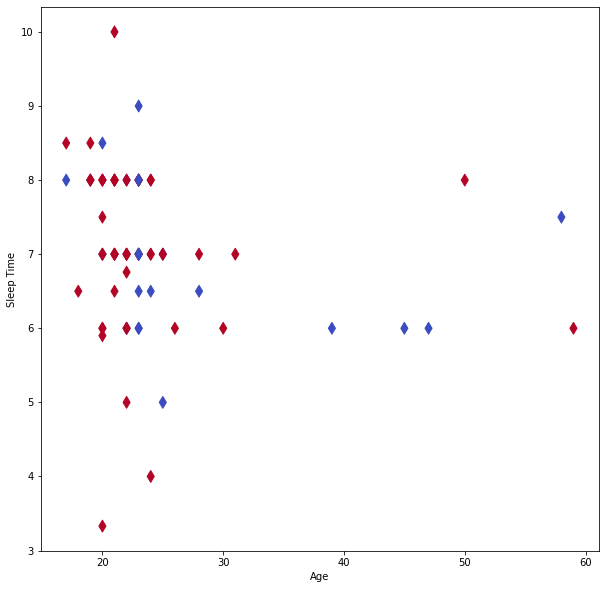

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(sleep_data['Age'],sleep_data['sleep time'],c=sleep_data['Gender'],cmap='coolwarm',s=70,marker='d')
plt.xlabel("Age")
plt.ylabel("Sleep Time")
plt.show()

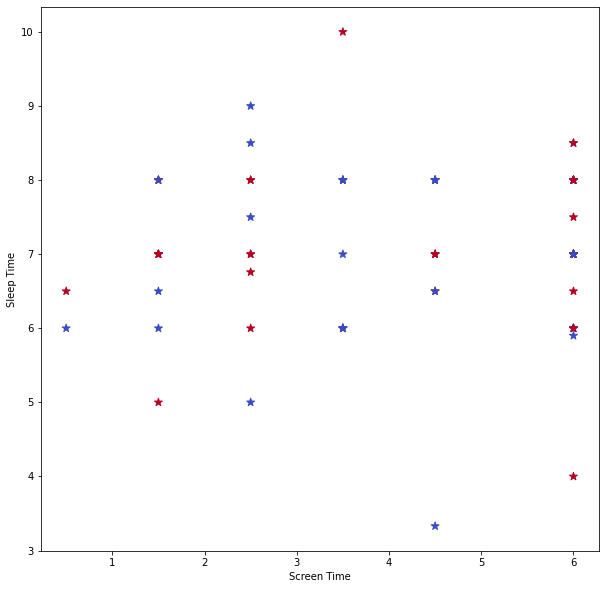

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(sleep_data['screen time'],sleep_data['sleep time'],c=sleep_data['bluelight filter'],cmap='coolwarm',s=70,marker='*')
plt.xlabel("Screen Time")
plt.ylabel("Sleep Time")
plt.show()

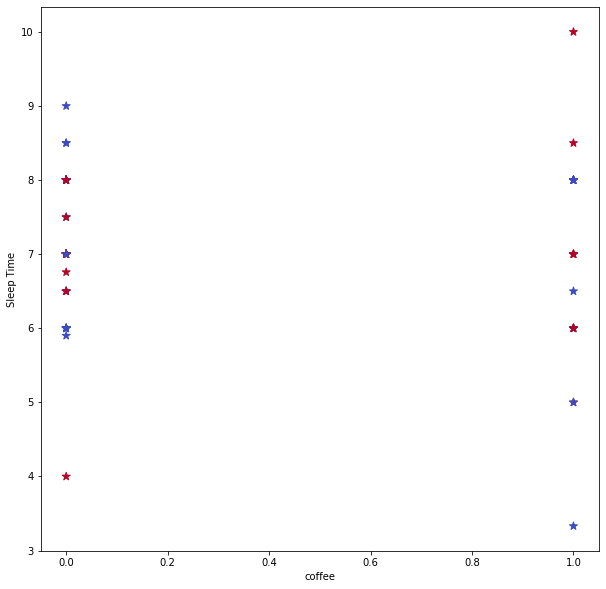

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(sleep_data['Coffee'],sleep_data['sleep time'],c=sleep_data['bluelight filter'],cmap='coolwarm',s=70,marker='*')
plt.xlabel("coffee")
plt.ylabel("Sleep Time")
plt.show()

In [82]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 79
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               77 non-null     int64  
 1   Gender            77 non-null     int64  
 2   meals/day         77 non-null     int64  
 3   physical illness  77 non-null     int64  
 4   screen time       77 non-null     float64
 5   bluelight filter  77 non-null     int64  
 6   sleep direction   77 non-null     object 
 7   exercise          77 non-null     int64  
 8   smoke/drink       77 non-null     int64  
 9   beverage          77 non-null     object 
 10  sleep time        77 non-null     float64
 11  Tea               77 non-null     int64  
 12  Coffee            77 non-null     int64  
 13  west              77 non-null     int64  
 14  east              77 non-null     int64  
 15  south             77 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usa

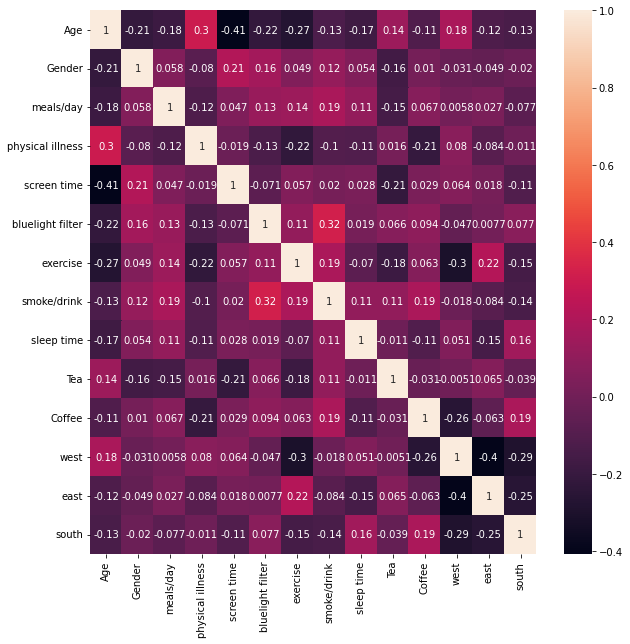

In [89]:
del_columns=['sleep direction','beverage']
M=sleep_data.copy()
M.drop(columns=del_columns,inplace=True)
cormat=M.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cormat,annot=True)
plt.show()

In [86]:
type(cormat)

pandas.core.frame.DataFrame

In [87]:
cormat

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,exercise,smoke/drink,sleep time,Tea,Coffee,west,east,south
Age,1.000000,-0.214156,-0.184366,0.297238,-0.407600,-0.218274,-0.271669,-0.125558,-0.171466,0.141135,-0.111422,0.182667,-0.120091,-0.133578
Gender,-0.214156,1.000000,0.057577,-0.079799,0.212146,0.159506,0.048995,0.115266,0.053912,-0.163812,0.010343,-0.031447,-0.048995,-0.020079
meals/day,-0.184366,0.057577,1.000000,-0.120598,0.047356,0.130688,0.139885,0.185535,0.114429,-0.152645,0.067009,0.005758,0.027369,-0.077203
physical illness,0.297238,-0.079799,-0.120598,1.000000,-0.018521,-0.131430,-0.224781,-0.100000,-0.107954,0.016496,-0.206380,0.079799,-0.084293,-0.011323
screen time,-0.407600,0.212146,0.047356,-0.018521,1.000000,-0.071409,0.057351,0.019678,0.028078,-0.211185,0.029187,0.064455,0.017780,-0.110227
bluelight filter,-0.218274,0.159506,0.130688,-0.131430,-0.071409,1.000000,0.110786,0.320362,0.019354,0.066396,0.093609,-0.047342,0.007693,0.077198
exercise,-0.271669,0.048995,0.139885,-0.224781,0.057351,0.110786,1.000000,0.187317,-0.070253,-0.183851,0.063030,-0.304769,0.215789,-0.153769
smoke/drink,-0.125558,0.115266,0.185535,-0.100000,0.019678,0.320362,0.187317,1.000000,0.107665,0.107222,0.188434,-0.017733,-0.084293,-0.135873
sleep time,-0.171466,0.053912,0.114429,-0.107954,0.028078,0.019354,-0.070253,0.107665,1.000000,-0.011300,-0.110465,0.050722,-0.146780,0.158256
Tea,0.141135,-0.163812,-0.152645,0.016496,-0.211185,0.066396,-0.183851,0.107222,-0.011300,1.000000,-0.031083,-0.005119,0.064889,-0.039223
